#**REAL-TIME ELECTION RESULTS: PORTUGAL 2019**

*Autor: Alejandra Elizabeth Moreno Morales*

Las variables en el conjunto de datos utilizadas: -

1. TimeElapsed (numeric): Tiempo (minutos) transcurrido desde la primera adquisición de datos
2. time (timestamp): fecha y hora de la adquisición de datos
3. territoryName (string): nombre corto de la ubicación (distrito o a nivel nacional)
4. totalMandates (numeric): diputados elegidos en este momento
5. availableMandates (numeric): quedan parlamentarios para elegir en este momento
6. numParishes (numeric): número total de parroquias en esta ubicación
7. numParishesApproved (numeric): Número de parroquias aprobadas en esta ubicación
8. BlankVotes (numeric): Número de votos en blanco.
9. whiteVotesPercentage (numeric): Porcentaje de votos en blanco
10. nullVotes (numeric): Número de votos nulos
11. nullVotesPercentage (numeric): Porcentaje de votos nulos
12. votantesPercentage (numeric): Porcentaje de votantes
13. subscribedVoters (numeric): número de votantes suscritos en la ubicación
14. totalVoters (numeric): Porcentaje de votos en blanco
15. pre.blankVotes (numeric): Número de votos en blanco (elección anterior)
16. pre.blankVotesPercentage (numeric): Porcentaje de votos en blanco (elección anterior)
17. pre.nullVotes (numeric): Número de votos nulos (elección anterior)
18. pre.nullVotesPercentage (numeric): Porcentaje de votos nulos (elección anterior)
19. pre.votersPercentage (numeric): Porcentaje de votantes (elección anterior)
20. pre.subscribedVoters (numeric): Número de votantes suscritos en la ubicación (elección anterior)
21. pre.totalVoters (numeric): Porcentaje de votos en blanco (elección anterior)
22. Party (string): Partido Político
23. Mandates (numeric): diputados elegidos en ese momento para el partido en un distrito determinado
24. Percentage (numeric): Porcentaje de votos en un partido
25. validVotesPercentage (numeric): Porcentaje de votos válidos en un partido
26. Votes (numeric): Porcentaje de votos del partido
27. Hondt (numeric): Número de diputados según la distribución de votos actual
28. FinalMandates  (numeric): Objetivo: número final de parlamentarios electos a nivel de distrito/nacional

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

##**ANÁLISIS EXPLORATORIO**

## **Descarga de Dataset**

In [ ]:
data_fname = "ElectionData.csv"

df_data = pd.read_csv(data_fname)

## **Inspección de datos**

In [ ]:
df_data.head(3)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19


In [ ]:
## Tamaño del conjunto de datos
df_data.shape

(21643, 28)

In [ ]:
## Tipos de datos por columna
df_data.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [ ]:
# Número de registro por periodo de tiempo
n = df_data.groupby(['time']).size()

print("Registros por captura de tiempo:",
      n)

Registros por captura de tiempo: time
2019-10-06 20:10:02    386
2019-10-06 20:15:02    386
2019-10-06 20:20:02    386
2019-10-06 20:25:02    386
2019-10-06 20:30:02    386
2019-10-06 20:35:02    386
2019-10-06 20:40:02    386
2019-10-06 20:45:02    403
2019-10-06 20:50:01    403
2019-10-06 20:55:01    403
2019-10-06 21:00:01    403
2019-10-06 21:05:01    403
2019-10-06 21:10:01    403
2019-10-06 21:15:02    403
2019-10-06 21:20:02    403
2019-10-06 21:25:02    403
2019-10-06 21:30:01    403
2019-10-06 21:35:01    403
2019-10-06 21:40:02    403
2019-10-06 21:45:02    403
2019-10-06 21:50:01    403
2019-10-06 21:55:01    403
2019-10-06 22:00:02    403
2019-10-06 22:05:02    403
2019-10-06 22:10:01    403
2019-10-06 22:15:01    403
2019-10-06 22:20:02    403
2019-10-06 22:25:01    403
2019-10-06 22:30:01    403
2019-10-06 22:35:01    403
2019-10-06 22:40:02    403
2019-10-06 22:45:01    403
2019-10-06 22:50:01    403
2019-10-06 22:55:02    403
2019-10-06 23:00:01    403
2019-10-06 23:05:

In [ ]:
# Variable de tiempo no se considera determinante. Se elimina
df_data = df_data.drop('time', axis=1)

In [ ]:
# Nuevo tamaño del conjunto
df_data.shape

(21643, 27)

In [ ]:
# Tratamiento de variables de tiempo
#df_data['Date'] = pd.to_datetime(df_data['time']).dt.date
#df_data['time'] = pd.to_datetime(df_data['time']).dt.time

In [ ]:
## Estadísticas descriptivas (tendencia central, la dispersión y la distribución del conjunto de datos, excluyendo valores NaN)
df_data.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [ ]:
df_data.dtypes

TimeElapsed                   int64
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates                 int64
dtype: object

## **Análisis de los datos**

### Histograma de distribución de las variables

array([[<Axes: title={'center': 'TimeElapsed'}>,
        <Axes: title={'center': 'totalMandates'}>,
        <Axes: title={'center': 'availableMandates'}>,
        <Axes: title={'center': 'numParishes'}>,
        <Axes: title={'center': 'numParishesApproved'}>],
       [<Axes: title={'center': 'blankVotes'}>,
        <Axes: title={'center': 'blankVotesPercentage'}>,
        <Axes: title={'center': 'nullVotes'}>,
        <Axes: title={'center': 'nullVotesPercentage'}>,
        <Axes: title={'center': 'votersPercentage'}>],
       [<Axes: title={'center': 'subscribedVoters'}>,
        <Axes: title={'center': 'totalVoters'}>,
        <Axes: title={'center': 'pre.blankVotes'}>,
        <Axes: title={'center': 'pre.blankVotesPercentage'}>,
        <Axes: title={'center': 'pre.nullVotes'}>],
       [<Axes: title={'center': 'pre.nullVotesPercentage'}>,
        <Axes: title={'center': 'pre.votersPercentage'}>,
        <Axes: title={'center': 'pre.subscribedVoters'}>,
        <Axes: title={'cent

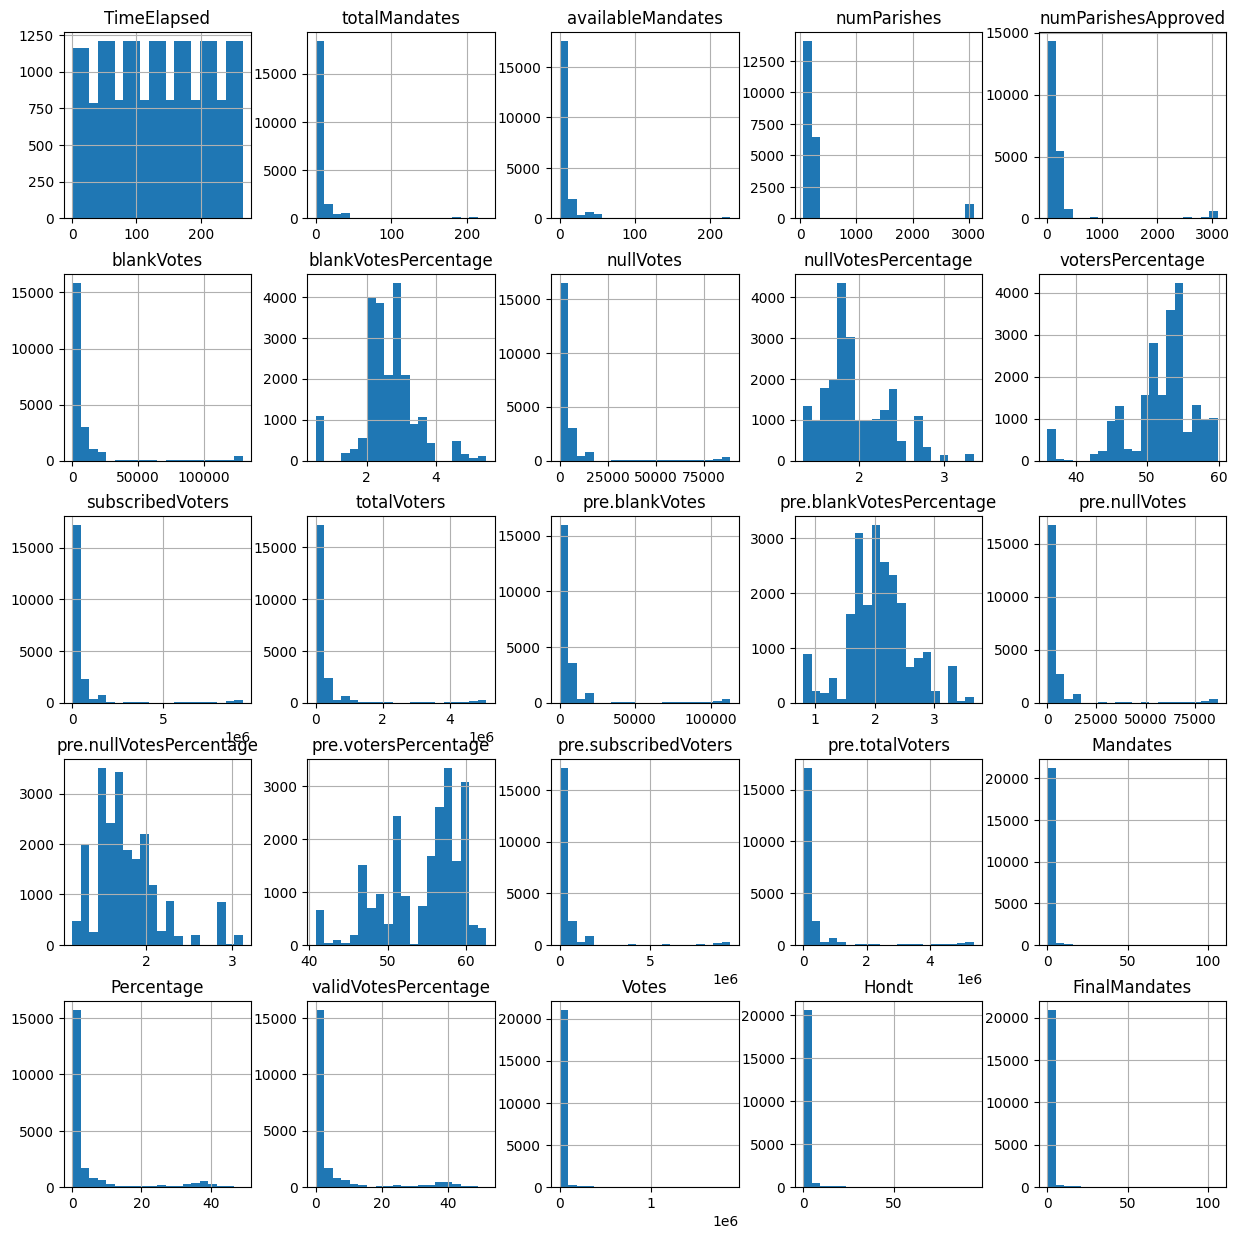

In [ ]:
df_data.hist(figsize=(15,15), layout=(5,5), bins=20)

Se observan variables constantes en su distribución y algunas otras variables dinamicas en su distribución

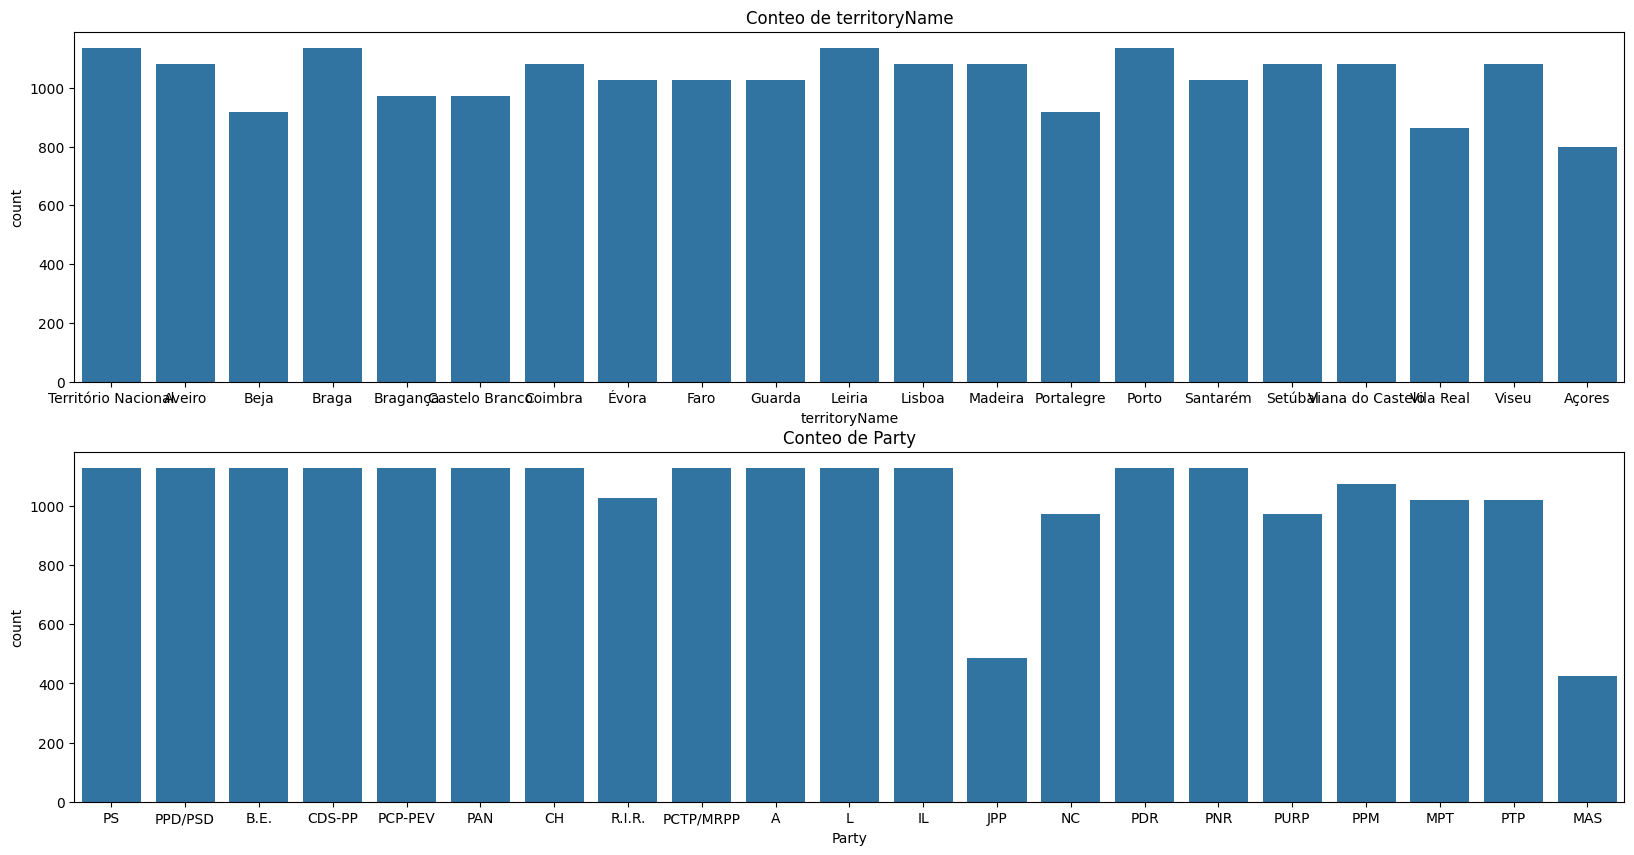

In [ ]:
## Distribución de datos de variables principales 'Territorios (distritos)' y 'Partidos politicos'
vars_ = ["territoryName", "Party"]

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=[20,10])
for i in range(0,len(vars_)):
    axes[i]=sns.countplot(x = vars_[i],data = df_data,ax=axes[i])
    axes[i].set_title("Conteo de "+vars_[i])

Se observa una distribución uniforme en los datos de territorio (distrito) siendo el de menos datos, el territorio de Acores.
La distribución de dato de los partidos politicos no es tan uniforme pues se observan valores menores en los partidos de JPP y MAS.

### Relación de las variables principales: Territorio (distrito) y partido politico

In [ ]:
cross_reltable=pd.crosstab(df_data['territoryName'],df_data['Party'])
cross_reltable

Party,A,B.E.,CDS-PP,CH,IL,JPP,L,MAS,MPT,NC,...,PCP-PEV,PCTP/MRPP,PDR,PNR,PPD/PSD,PPM,PS,PTP,PURP,R.I.R.
territoryName,,,,,,,,,,,,,,,,,,,,,
Aveiro,54,54,54,54,54,54,54,0,54,54,...,54,54,54,54,54,54,54,54,54,54
Açores,47,47,47,47,47,0,47,47,47,0,...,47,47,47,47,47,47,47,47,0,0
Beja,54,54,54,54,54,0,54,0,54,54,...,54,54,54,54,54,54,54,54,0,0
Braga,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Bragança,54,54,54,54,54,0,54,0,0,54,...,54,54,54,54,54,54,54,54,54,54
Castelo Branco,54,54,54,54,54,0,54,0,54,0,...,54,54,54,54,54,54,54,54,54,54
Coimbra,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,0,54,54
Faro,54,54,54,54,54,0,54,0,54,54,...,54,54,54,54,54,54,54,54,54,54
Guarda,54,54,54,54,54,0,54,0,54,54,...,54,54,54,54,54,54,54,54,54,54


La relación de las variables de territorio y partido pólitica nos revela cierta uniformidad a excepción del territorio de Acores donde es visible que aparecen menos partidos póliticos. Se plantea la hipotesis de que no existen todos los partidos en este territorio o aparecen en un tiempo posterior

In [ ]:
#cross_reltable.T.plot(kind='bar',figsize=(30,10))

In [ ]:
## Número de parlamentarios electos por partido
pd.pivot_table(df_data,index ='Party', values = 'FinalMandates',aggfunc=np.mean).sort_values('FinalMandates', ascending = False)

,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
CH,0.095830
IL,0.095830
L,0.095830


Se observan que destacan los partidos 'PS' y 'PPD/PSD' en número de candidatos electos

In [ ]:
## Votos validos por partido
pd.pivot_table(df_data, index ='Party' ,values = 'validVotesPercentage').sort_values('validVotesPercentage',ascending=False)

,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


Se observa que el partido 'PS' obtiene un porcentaje más alto de votos válidos, mientas que el partido 'MAS' obtiene el menor porcentaje de votos válidos

In [ ]:
## Votos núlos por partido
pd.pivot_table(df_data, index ='Party' ,values = 'nullVotesPercentage').sort_values('nullVotesPercentage',ascending=False)

,nullVotesPercentage
Party,
R.I.R.,1.995624
PURP,1.970031
PPM,1.967875
B.E.,1.965741
PS,1.965741
PPD/PSD,1.965741
PNR,1.965741
PDR,1.965741
PCTP/MRPP,1.965741


Se observa consistencia en el porcentaje de votos nulos entre los partidos

In [ ]:
## Votos en blanco por partido
pd.pivot_table(df_data, index ='Party' ,values = 'blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)

,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
PCP-PEV,2.618181
PS,2.618181
PPD/PSD,2.618181
PNR,2.618181


Se observa que el partido 'MAS' tiene un porcentaje de votos en blanco más alto; mientras que los demás partidos se mantienen un tanto constantes

##**Tratamiento de datos**

### Valores nulos

In [ ]:
## Exploración datos nulos en columnas
df_data.info()

# Dado a que no se encuentran valores nulos en el conjunto de datos, se elimina grafico
#sns.heatmap(df_data.isnull())
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   territoryName             21643 non-null  object 
 2   totalMandates             21643 non-null  int64  
 3   availableMandates         21643 non-null  int64  
 4   numParishes               21643 non-null  int64  
 5   numParishesApproved       21643 non-null  int64  
 6   blankVotes                21643 non-null  int64  
 7   blankVotesPercentage      21643 non-null  float64
 8   nullVotes                 21643 non-null  int64  
 9   nullVotesPercentage       21643 non-null  float64
 10  votersPercentage          21643 non-null  float64
 11  subscribedVoters          21643 non-null  int64  
 12  totalVoters               21643 non-null  int64  
 13  pre.blankVotes            21643 non-null  int64  
 14  pre.bl

*No se observan valores nulos en ninguno de los campos*

### Variables estrechamente relacionadas. Reducción de dimensionalidad

In [ ]:
## Visualización de correlación de las variables númericas
df_numerics = df_data.select_dtypes(np.number)
corr = df_numerics.corr()
corr_features = corr.index
#plt.figure(figsize=(15,10))
#sns.heatmap(df_data[corr_features].corr(),cmap="RdYlGn",annot=False)

print('\n------------------------------------------------------------')
print('TABLA DE CORRELACIONES')
print('------------------------------------------------------------')
print(corr.corr())


------------------------------------------------------------
TABLA DE CORRELACIONES
------------------------------------------------------------
                          TimeElapsed  totalMandates  availableMandates  \
TimeElapsed                  1.000000       0.362834          -0.309768   
totalMandates                0.362834       1.000000           0.571625   
availableMandates           -0.309768       0.571625           1.000000   
numParishes                  0.100935       0.927614           0.823859   
numParishesApproved          0.205888       0.970881           0.734608   
blankVotes                   0.300940       0.995065           0.646254   
blankVotesPercentage         0.001644      -0.215761          -0.196124   
nullVotes                    0.291681       0.994299           0.654749   
nullVotesPercentage         -0.538662      -0.575222          -0.222720   
votersPercentage             0.064578       0.190136           0.116781   
subscribedVoters             

*Se observa intensidad de relación lineal entre las variables. Existen variables con coeficiente de correlación mayor al 0.90.
se unificarán estas variables en un solo valor para reducir dimensionalidad.*

In [ ]:
# Se agrupa un primero grupo de variables que se encuentran estrechamente relacionadas ya que describen información de votos entre distintas variables categoricas
group1 = ['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage']
df_group1 = df_data[group1]
corr_grp1 = df_group1.corr()
corr_features2 = corr_grp1.index

print('\n------------------------------------------------------------')
print('TABLA DE CORRELACIONES GRUPO 1')
print('------------------------------------------------------------')
print(corr_grp1.corr())



------------------------------------------------------------
TABLA DE CORRELACIONES GRUPO 1
------------------------------------------------------------
                          totalMandates  numParishesApproved  blankVotes  \
totalMandates                  1.000000             0.989765    0.998222   
numParishesApproved            0.989765             1.000000    0.995272   
blankVotes                     0.998222             0.995272    1.000000   
nullVotes                      0.998276             0.995396    0.999854   
subscribedVoters               0.998743             0.994797    0.999797   
totalVoters                    0.998870             0.993834    0.999684   
pre.blankVotes                 0.998492             0.994985    0.999987   
pre.nullVotes                  0.998491             0.995323    0.999750   
pre.subscribedVoters           0.998633             0.995049    0.999817   
pre.totalVoters                0.998809             0.994084    0.999729   
Percentage

In [ ]:
# Se agrupa un segundo grupo de variables que estan relacionadas por su dependencia. Número de votos con número de diputados según la distribución de votos actual
group2 = ['Votes','Hondt']
df_group2 = df_data[group2]
corr_grp2 = df_group2.corr()
corr_features2 = corr_grp2.index

# Obtenemos las correlaciones
print('\n------------------------------------------------------------')
print('TABLA DE CORRELACIONES GRUPO 2')
print('------------------------------------------------------------')
print(corr_grp2.corr())


------------------------------------------------------------
TABLA DE CORRELACIONES GRUPO 2
------------------------------------------------------------
       Votes  Hondt
Votes    1.0   -1.0
Hondt   -1.0    1.0


In [ ]:
## Usando la función de StandarScaler de la libreria de preprocesamiento de Sklearn y la función PCA del conjunto de descomposición, se realizará el proceso de escalamiento y estandarización de las variables correlacionadas para posteriormente unificarla en una sola variable

## Variables correlacionadas
corr_vars1=['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage']
corr_vars2=['Votes','Hondt']

# Escalamiento
df1 = df_data[corr_vars1]
df2 = df_data[corr_vars2]

# Estandarización y transformación a distribución normal
sc = StandardScaler()
fit_df = sc.fit_transform(df1)
df_1 = pd.DataFrame(fit_df,columns=df1.columns)

fit_df2 = sc.fit_transform(df2)
df_2 = pd.DataFrame(fit_df2,columns=df2.columns)

# Unificación
pca = PCA(n_components=1)
new_var1 = pca.fit_transform(df_1)
new_var2 = pca.fit_transform(df_2)

# Actualización del conjunto de datos
df_data_reduced = pd.concat((df_data, pd.DataFrame(new_var1)), axis=1)
df_data_reduced.rename({0: 'grp1_corrvars'}, axis=1, inplace = True)
df_data_reduced.drop(corr_vars1, axis=1, inplace=True)

df_data_reduced = pd.concat((df_data_reduced, pd.DataFrame(new_var2)), axis=1)
df_data_reduced.rename({0: 'grp2_corrvars'}, axis=1, inplace = True)
df_data_reduced.drop(corr_vars2, axis=1, inplace=True)

df_data = df_data_reduced
df_data.head(5)

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,FinalMandates,grp1_corrvars,grp2_corrvars
0,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,106,0.508012,11.438592
1,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,77,0.508034,9.830850
2,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,19,0.508147,1.750582
3,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,5,0.508155,1.245075
4,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,12,0.508156,1.123863


In [ ]:
df_data.shape

(21643, 13)

In [ ]:
df_data.dtypes

TimeElapsed                  int64
territoryName               object
availableMandates            int64
numParishes                  int64
blankVotesPercentage       float64
nullVotesPercentage        float64
votersPercentage           float64
pre.nullVotesPercentage    float64
Party                       object
validVotesPercentage       float64
FinalMandates                int64
grp1_corrvars              float64
grp2_corrvars              float64
dtype: object

### Valores atipicos

TimeElapsed                   Axes(0.125,0.747241;0.133621x0.132759)
availableMandates          Axes(0.285345,0.747241;0.133621x0.132759)
numParishes                 Axes(0.44569,0.747241;0.133621x0.132759)
blankVotesPercentage       Axes(0.606034,0.747241;0.133621x0.132759)
nullVotesPercentage        Axes(0.766379,0.747241;0.133621x0.132759)
votersPercentage              Axes(0.125,0.587931;0.133621x0.132759)
pre.nullVotesPercentage    Axes(0.285345,0.587931;0.133621x0.132759)
validVotesPercentage        Axes(0.44569,0.587931;0.133621x0.132759)
FinalMandates              Axes(0.606034,0.587931;0.133621x0.132759)
grp1_corrvars              Axes(0.766379,0.587931;0.133621x0.132759)
grp2_corrvars                 Axes(0.125,0.428621;0.133621x0.132759)
dtype: object

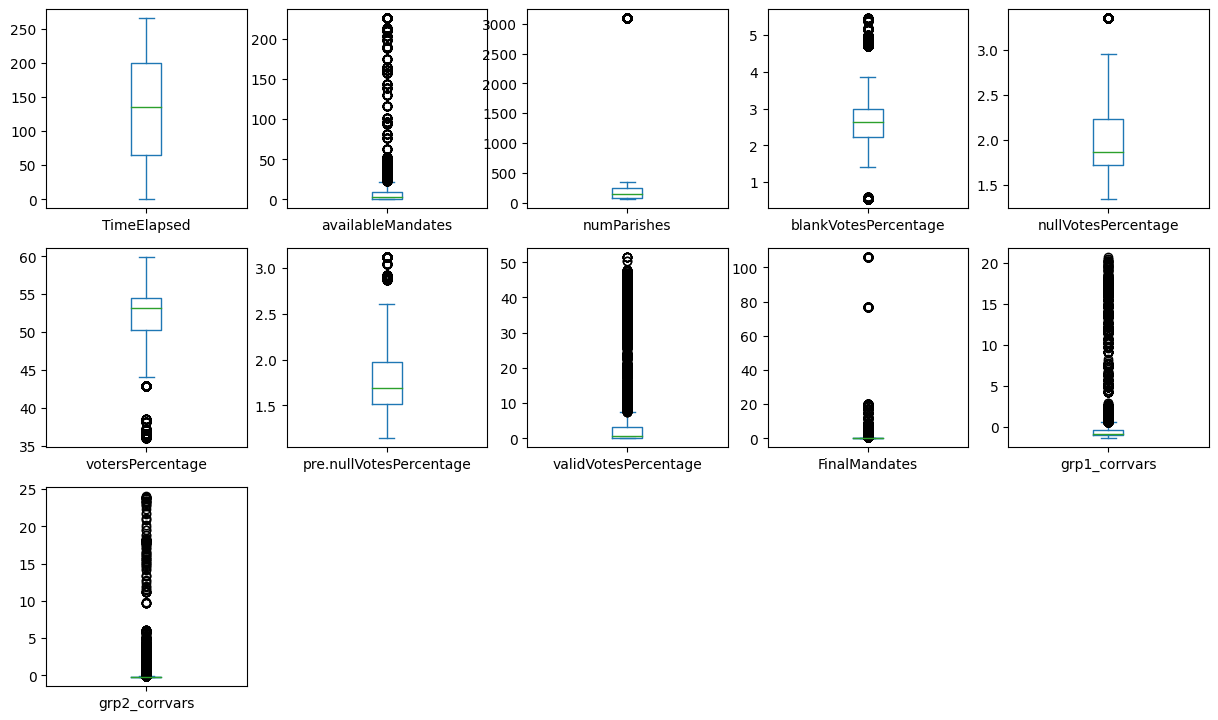

In [ ]:
## Exploración y detección de valores atipicos entre las variables númericas
df_numerics = df_data.select_dtypes(np.number)
df_numerics.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

*Se observan valores atipicos en algunas variables*

In [ ]:
## Tratamiento de valores atípicos
## Usando el indicador z-score definiremos un limite 3 para descartar los valores fuera de este rango en su desviación estandar
#z = np.abs(zscore(df_numerics))
#threshold = 3

#Entradas con z-score menor a 3
#zscore_menores= (z < 3).all(axis=1)
#df_data2 = df_numerics[zscore_menores]

#Eliminación de valores atipicos
#df_data2 = df_data[(z<3).all(axis = 1)]
#df_data = df_data2


In [ ]:
## Graficos Boxplot sin valores atipicos
#df_data.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [ ]:
print ("Tamaño actual del conjunto de datos:", df_data.shape)

Tamaño actual del conjunto de datos: (21643, 13)


Se reduce el conjunto de datos debido a la eliminación de los datos atipicos

In [ ]:
#df_Fm = df_data[df_data['FinalMandates']>=20]
#df_Fm
#Agregar relaciones de variables importantes y tratar especificamente relaciones

In [ ]:
#sns.boxplot(data=df_data, x="FinalMandates", y="territoryName")

### Variables categoricas

In [ ]:
## Haciendo uso de la función LabelEncoder de la libreria de preprocesamiento de Skelearn, transformaremos las variables categoricas a númericas
categorical_vars =[]
for i in df_data.columns:
    if df_data[i].dtypes=="O":
        categorical_vars.append(i)

print("Las variables categoricas son:", categorical_vars)

#le = LabelEncoder()

#for i in categorical_vars:
#    df_data[i]=pd.DataFrame(le.fit_transform(df_data[i]))

#df_data.head(5)
#print (df_data.info())

Las variables categoricas son: ['territoryName', 'Party']


Se sustituye tecnica LabelEncoder por OneHotEncoder por sugerencia de tutoria


In [ ]:
df_data.territoryName.unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

In [ ]:
df_data.Party.unique()

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_encoded = encoder.fit_transform(df_data[categorical_vars])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_vars))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_vars, axis=1)

df_data = df_encoded

df_data.head(5)
print (df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TimeElapsed                        21643 non-null  int64  
 1   availableMandates                  21643 non-null  int64  
 2   numParishes                        21643 non-null  int64  
 3   blankVotesPercentage               21643 non-null  float64
 4   nullVotesPercentage                21643 non-null  float64
 5   votersPercentage                   21643 non-null  float64
 6   pre.nullVotesPercentage            21643 non-null  float64
 7   validVotesPercentage               21643 non-null  float64
 8   FinalMandates                      21643 non-null  int64  
 9   grp1_corrvars                      21643 non-null  float64
 10  grp2_corrvars                      21643 non-null  float64
 11  territoryName_Aveiro               21643 non-null  flo

In [ ]:
df_data.head(3)

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,FinalMandates,grp1_corrvars,...,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.
0,0,226,3092,2.5,2.3,51.36,1.91,40.22,106,0.508012,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,226,3092,2.5,2.3,51.36,1.91,34.95,77,0.508034,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,226,3092,2.5,2.3,51.36,1.91,7.15,19,0.508147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Tamaño del conjunto de datos:", df_data.shape)

Tamaño del conjunto de datos: (21643, 53)


## **Desarrollo de modelos**


### Separación de conjunto de datos: Variable dependiente y variable independiente (target)



In [ ]:
## Separación de conjunto de datos entre conjunto de entrenamiento y pruebas
X = df_data.drop(['FinalMandates'],axis=1)
y = df_data['FinalMandates']


### Selección de características

Método RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)

selector.fit(X, y)

print(selector.support_)
print(selector.ranking_)

[False False False False False False False False  True  True False False
 False False False False False False False False  True  True False  True
 False False  True False False False False False  True  True False False
 False False False False False False  True False False False False False
  True False False False]
[43 37 41 22 35 40 23 39  1  1 17  9  4 18  3  8 14 11  7 15  1  1  2  1
 13 16  1 10  6 12  5 34  1  1 42 32 21 31 20 28 27 19  1 33 29 30 36 25
  1 24 26 38]


In [ ]:
x_topfeatures = X.loc[:,selector.support_]
x_topfeatures

,grp1_corrvars,grp2_corrvars,territoryName_Lisboa,territoryName_Madeira,territoryName_Porto,territoryName_Território Nacional,Party_B.E.,Party_CDS-PP,Party_PCP-PEV,Party_PS
0,0.508012,11.438592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.508034,9.830850,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.508147,1.750582,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.508155,1.245075,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.508156,1.123863,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21638,-0.523330,-0.244401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21639,-0.523330,-0.244447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21640,-0.523329,-0.244979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21641,-0.523329,-0.245108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Método ExtraTreesClassifier

In [ ]:
## Usando la funcion ExtraTreesClassifier se obtendran las diez características principales
#model = ExtraTreesClassifier()
#model.fit(X,y)

In [ ]:
## Top 10 de catacteristicas por importancia
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(kind='bar')
#plt.show()

In [ ]:
## Coeficientes de correlación de las 10 principales características
#corrvars = df_data.corr()
#top_features = corrvars.index
#plt.figure(figsize=(20,20))

#g=sns.heatmap(df_data[top_features].corr(),annot=True,cmap="RdYlGn")

### Separación de conjunto de datos en entrenamiento y pruebas

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_topfeatures,y,test_size=0.3,random_state=45)

### Escalamiento de datos en conjunto

In [ ]:
sc = StandardScaler()
a = sc.fit_transform(X_train)
X_train = pd.DataFrame(a,columns=X_train.columns)
X_train.head()


,grp1_corrvars,grp2_corrvars,territoryName_Lisboa,territoryName_Madeira,territoryName_Porto,territoryName_Território Nacional,Party_B.E.,Party_CDS-PP,Party_PCP-PEV,Party_PS
0,-0.301001,-0.179296,-0.228378,-0.227897,-0.235957,-0.236268,-0.235645,-0.231560,-0.233609,-0.237666
1,-0.101583,-0.117456,-0.228378,-0.227897,-0.235957,-0.236268,-0.235645,4.318542,-0.233609,-0.237666
2,-0.392984,-0.181288,4.378710,-0.227897,-0.235957,-0.236268,-0.235645,-0.231560,-0.233609,-0.237666
3,0.021172,-0.125429,-0.228378,-0.227897,-0.235957,-0.236268,-0.235645,-0.231560,-0.233609,-0.237666
4,-0.313291,-0.180717,-0.228378,-0.227897,-0.235957,-0.236268,-0.235645,-0.231560,-0.233609,-0.237666


### Modelo: Lineal Regression

Modelo 1 : Lineal Regression sin hiperparametros

In [ ]:
print("MODELO: LINEAL REGRESSION")
lineal_regression = LinearRegression()

lineal_regression.fit(X_train,y_train)
scores_lr=lineal_regression.score(X_train,y_train)

predictions_lr=lineal_regression.predict(X_test)

print("Scores:", scores_lr)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_lr)))
print('R2 score:',r2_score(y_test,predictions_lr))


MODELO: LINEAL REGRESSION
Scores: 0.9543178536239916
RMSE: 4.248207804720592
R2 score: 0.549331702196227


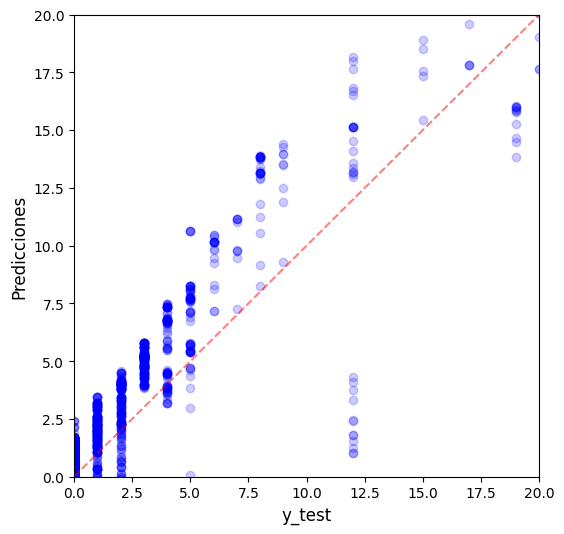

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_lr, marker= "o",color="blue",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

  R2 score demasiado bajo. Predicciones muy por fuera de la linea de regresión.

---

Ajuste de hiperparametros

class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False



---

Modelo 2 : Lineal Regression. Sin calculo de intercepcion, X se sobreescribira, 10 jobs para computación y coeficientes se forzan a ser positivos

In [ ]:
print("MODELO: LINEAL REGRESSION 2")
lineal_regression2 = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=10,  positive=True)

lineal_regression2.fit(X_train,y_train)
scores_lr2 = lineal_regression2.score(X_train,y_train)

predictions_lr2=lineal_regression2.predict(X_test)

print("Scores:", scores_lr2)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_lr2)))
print('R2 score:',r2_score(y_test,predictions_lr2))

MODELO: LINEAL REGRESSION 2
Scores: 0.9142739993752735
RMSE: 3.1696281143983582
R2 score: 0.7491222624145152


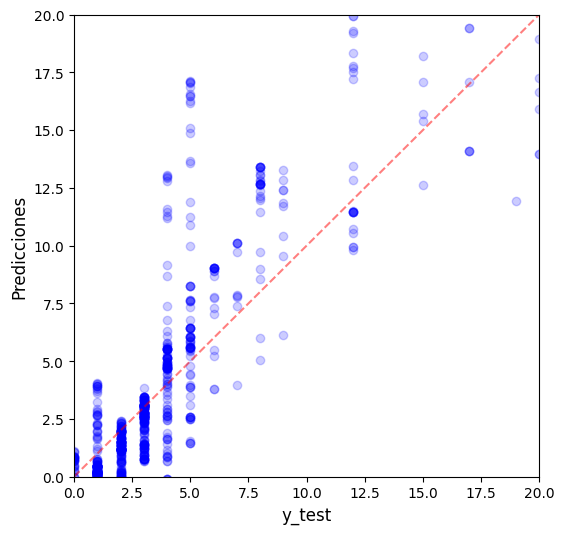

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_lr2, marker= "o",color="blue",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Se obtienen predicciones aun con un comportamiento muy disperso.

---

Modelo 3 : Lineal Regression. Sin calculo de intercepcion, X se sobreescribira, 100 jobs para computación y coeficientes se forzan a ser positivos

In [ ]:
print("MODELO: LINEAL REGRESSION 3")
lineal_regression3 = LinearRegression(fit_intercept=False, copy_X=False, n_jobs=100,  positive=True)

lineal_regression3.fit(X_train,y_train)
scores_lr3 = lineal_regression3.score(X_train,y_train)

predictions_lr3=lineal_regression3.predict(X_test)

print("Scores:", scores_lr3)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_lr3)))
print('R2 score:',r2_score(y_test,predictions_lr3))

MODELO: LINEAL REGRESSION 3
Scores: 0.9142739993752735
RMSE: 3.1696281143983582
R2 score: 0.7491222624145152


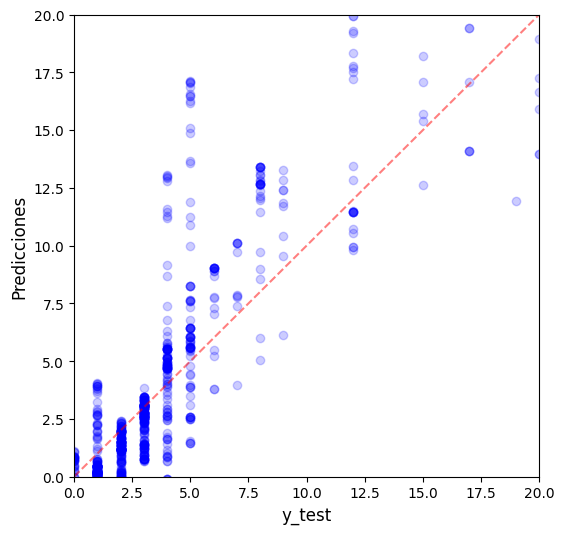

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_lr3, marker= "o",color="blue",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Predicciones muy dispersas y metrica R2 no relevante aun cuando se aumento el número de jobs para su computación

### Modelo: Decision Tree Regressor

Modelo 4 : Decision Tree Regressor sin hiperparametros

In [ ]:
print("MODELO: DECISION TREE REGRESSOR 1")
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)

decision_tree_regressor.fit(X_train,y_train)
scores_dtr=decision_tree_regressor.score(X_train,y_train)

predictions_dtr=decision_tree_regressor.predict(X_test)


print("Scores:", scores_dtr)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_dtr)))
print('R2 score:',r2_score(y_test,predictions_dtr))

MODELO: DECISION TREE REGRESSOR 1
Scores: 0.9999955009602882
RMSE: 2.6228626715614225
R2 score: 0.8282105028714815


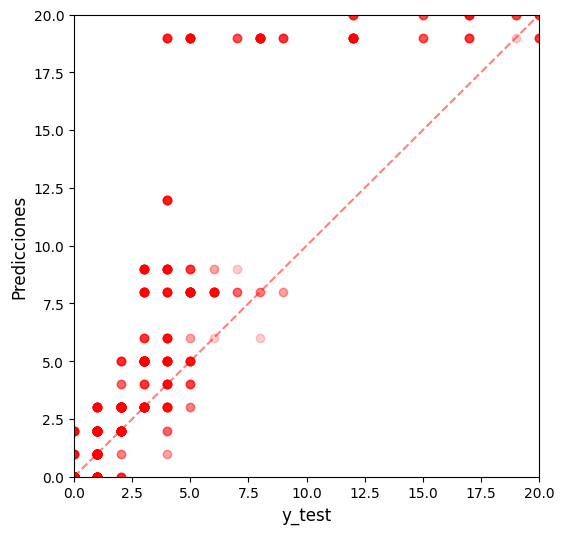

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_dtr, marker= "o",color="red",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Se obtiene una metrica de evaluación R2 mas alta sin embargo se perciben valores de predicciones muy dispersos en los extremos

---

Ajuste de hiperparametros

class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)

---

Modelo 5 : Decision Tree Regressor. Funcion de calidad: absolute_error, profundidad del arbol: 10, aleatoridad del estimador: 5

In [ ]:
print("MODELO: DECISION TREE REGRESSOR 2")
decision_tree_regressor2 = DecisionTreeRegressor(criterion = "absolute_error", max_depth = 10, random_state = 5)

decision_tree_regressor2.fit(X_train,y_train)
scores_dtr2 = decision_tree_regressor2.score(X_train,y_train)

predictions_dtr2 = decision_tree_regressor2.predict(X_test)


print("Scores:", scores_dtr2)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_dtr2)))
print('R2 score:',r2_score(y_test,predictions_dtr2))

MODELO: DECISION TREE REGRESSOR 2
Scores: 0.9995098858613932
RMSE: 2.5962156586439815
R2 score: 0.8316833674704573


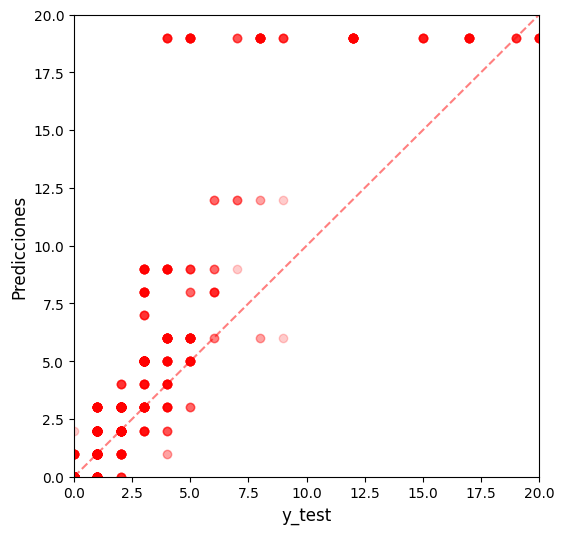

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_dtr2, marker= "o",color="red",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Se mejora la metrica de evaluación R2, sin embargo, aunque reducido aun se perciben valores dispersos en los extremos

---

Modelo 6 : Decision Tree Regressor. Funcion de calidad: squared_error, profundidad del arbol: 30, cantidad de caracteristicas para division: 12, aleatoridad del estimador: 5

In [ ]:
print("MODELO: DECISION TREE REGRESSOR 3")
decision_tree_regressor3 = DecisionTreeRegressor(criterion = "squared_error", max_depth = 30, max_features = 12, random_state = 5)

decision_tree_regressor3.fit(X_train,y_train)
scores_dtr3 = decision_tree_regressor3.score(X_train,y_train)

predictions_dtr3 = decision_tree_regressor3.predict(X_test)


print("Scores:", scores_dtr3)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_dtr3)))
print('R2 score:',r2_score(y_test,predictions_dtr3))

MODELO: DECISION TREE REGRESSOR 3
Scores: 0.9999955009602882
RMSE: 2.412969985118677
R2 score: 0.8546050430074406


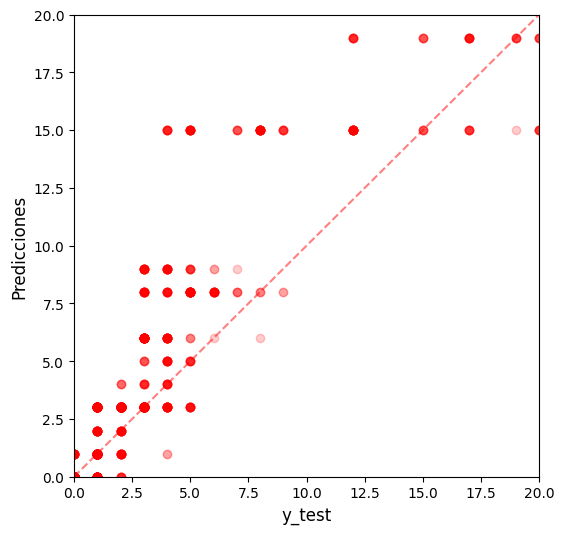

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_dtr3, marker= "o",color="red",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Se mejora la evaluación R2 al cambiar la función, sin embargo, aun se perciben valores dispersos en los extremos

### Modelo: Random Forest Regressor

Modelo 7 : Random Forest Regressor sin hiperparametros

In [ ]:
print("MODELO: RANDOM FOREST REGRESSOR")
rand_forest_regressor = RandomForestRegressor()

rand_forest_regressor.fit(X_train,y_train)
scores_rfr=rand_forest_regressor.score(X_train,y_train)

predictions_rfr=rand_forest_regressor.predict(X_test)


print("Scores:", scores_rfr)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_rfr)))
print('R2 score:',r2_score(y_test,predictions_rfr))

MODELO: RANDOM FOREST REGRESSOR
Scores: 0.9999657416638104
RMSE: 2.39571373691769
R2 score: 0.8566771782442506


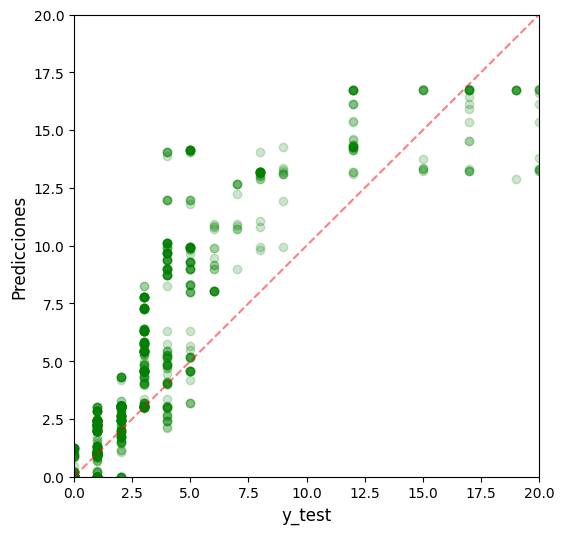

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_rfr, marker= "o",color="green",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Sin configurar hiperparametros, el modelo Random Forest nos da mejores resultados y comportamiento en las predicciones

---

Ajuste de hiperparametros

class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

---

Modelo 8 : Random Forest Regressor. Número de arboles: 200, máxima profundidad del arbol: 10, número de caracteristicas a la división: 10

In [ ]:
print("MODELO: RANDOM FOREST REGRESSOR 2")
rand_forest_regressor2 = RandomForestRegressor(n_estimators = 200, max_depth = 10, max_features= 10)

rand_forest_regressor2.fit(X_train,y_train)
scores_rfr2 = rand_forest_regressor2.score(X_train,y_train)

predictions_rfr2 = rand_forest_regressor2.predict(X_test)


print("Scores:", scores_rfr2)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_rfr2)))
print('R2 score:',r2_score(y_test,predictions_rfr2))

MODELO: RANDOM FOREST REGRESSOR 2
Scores: 0.999828139530447
RMSE: 2.3924101920398573
R2 score: 0.8570721727886914


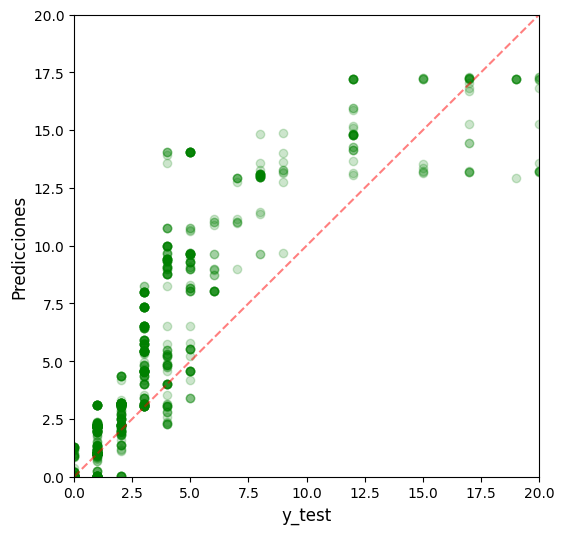

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_rfr2, marker= "o",color="green",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

Se aumenta el número de arboles y la profundidad del algoritmo, se mejora pero no considerablemente.

---

Modelo 9 : Random Forest Regressor. Número de arboles: 300, máxima profundidad del arbol: 10, número de caracteristicas a la división: 10, minimo de muestras en hoja: 4

In [ ]:
print("MODELO: RANDOM FOREST REGRESSOR 3")
rand_forest_regressor3 = RandomForestRegressor(n_estimators = 300, max_depth = 10, max_features= 10, min_samples_leaf = 4)

rand_forest_regressor3.fit(X_train,y_train)
scores_rfr3 = rand_forest_regressor3.score(X_train,y_train)

predictions_rfr3 = rand_forest_regressor3.predict(X_test)


print("Scores:", scores_rfr3)
print('RMSE:',np.sqrt(mean_squared_error(y_test,predictions_rfr3)))
print('R2 score:',r2_score(y_test,predictions_rfr3))

MODELO: RANDOM FOREST REGRESSOR 3
Scores: 0.9997363976738263
RMSE: 2.3848169613984527
R2 score: 0.8579780054744139


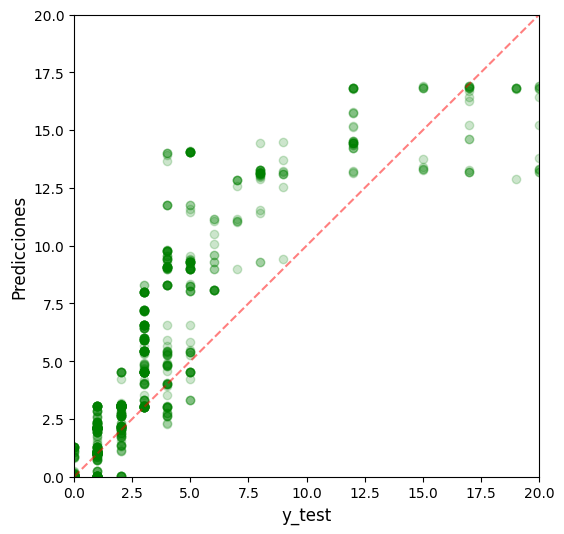

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,predictions_rfr3, marker= "o",color="green",alpha=0.2)
plt.xlabel('y_test', fontsize=12)
plt.ylabel('Predicciones', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

### Exportación de mejor modelo

In [80]:
import pickle

pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rand_forest_regressor3, file)

## **Conclusiones**



En la versión anterior se alcanzaban modelos con metricas de evaluación muy altas por lo que se trabajo en analizar los datos y detectar los motivos del sobreajuste. Se realizaron agrupaciones por variables estrechamente relacionadas y se hizo tratamiento de nulos, así como una selección de características que nos permitiera acercarnos a las variables con mayor importancia


Como resultado de la selección de caracteristicas más importantes y el ajuste de hiperparametros se encuentra que los modelos de RandomForestRegressor son los que nos dan mejores resultados, sin embargo, a pesar del ajuste de hiperparametros no se logró superar la metrica de R2 del 86%. Se evalua la posibilidad de mejorar el modelo cuando existan más registros en el conjunto de datos.